<a href="https://colab.research.google.com/github/nasarar/Post_Covid19_Vacation_Projection/blob/Joseph/pcvplanner_ver3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
# Step 1: Load the data
covid_19_PMV = pd.read_csv(
    'https://covid.ourworldindata.org/data/owid-covid-data.csv')
covid_19_PMV.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [37]:
covid_19_filtered= covid_19_PMV[['location','date','people_vaccinated','people_fully_vaccinated','population','population_density','gdp_per_capita']]
covid_19_filtered

,location,date,people_vaccinated,people_fully_vaccinated,population,population_density,gdp_per_capita
0,Afghanistan,2020-02-24,NaN,NaN,38928341.0,54.422,1803.987
1,Afghanistan,2020-02-25,NaN,NaN,38928341.0,54.422,1803.987
2,Afghanistan,2020-02-26,NaN,NaN,38928341.0,54.422,1803.987
3,Afghanistan,2020-02-27,NaN,NaN,38928341.0,54.422,1803.987
4,Afghanistan,2020-02-28,NaN,NaN,38928341.0,54.422,1803.987
...,...,...,...,...,...,...,...
93101,Zimbabwe,2021-05-29,666786.0,335679.0,14862927.0,42.729,1899.775
93102,Zimbabwe,2021-05-30,670755.0,341218.0,14862927.0,42.729,1899.775
93103,Zimbabwe,2021-05-31,675678.0,344400.0,14862927.0,42.729,1899.775
93104,Zimbabwe,2021-06-01,678003.0,353278.0,14862927.0,42.729,1899.775


In [38]:
covid_19_counts= covid_19_filtered["location"].value_counts()
covid_19_counts

Argentina                          519
Mexico                             519
Thailand                           516
Peru                               514
Taiwan                             504
                                  ... 
Kiribati                            16
British Virgin Islands               8
Cook Islands                         8
Turkmenistan                         1
Bonaire Sint Eustatius and Saba      1
Name: location, Length: 229, dtype: int64

In [39]:
covid_19_filtered.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
covid_19_counts[covid_19_counts>1].index

Index(['Argentina', 'Mexico', 'Thailand', 'Peru', 'Taiwan', 'South Korea',
       'Japan', 'China', 'World', 'United States',
       ...
       'Falkland Islands', 'Aruba', 'Curacao', 'Tonga', 'Nauru', 'Tuvalu',
       'Sint Maarten (Dutch part)', 'Kiribati', 'British Virgin Islands',
       'Cook Islands'],
      dtype='object', length=227)

In [41]:
covid_19_filtered2=covid_19_filtered["location"].isin(covid_19_counts[covid_19_counts>1].index)
covid_19_filtered2

442      True
451      True
455      True
457      True
458      True
         ... 
93100    True
93101    True
93102    True
93103    True
93104    True
Name: location, Length: 8186, dtype: bool

In [42]:
covid_19_filter= covid_19_filtered[covid_19_filtered2]
covid_19_filter

,location,date,people_vaccinated,people_fully_vaccinated,population,population_density,gdp_per_capita
442,Afghanistan,2021-05-11,448878.0,55624.0,38928341.0,54.422,1803.987
451,Afghanistan,2021-05-20,470341.0,77560.0,38928341.0,54.422,1803.987
455,Afghanistan,2021-05-24,476367.0,96910.0,38928341.0,54.422,1803.987
457,Afghanistan,2021-05-26,479372.0,111082.0,38928341.0,54.422,1803.987
458,Afghanistan,2021-05-27,479574.0,113739.0,38928341.0,54.422,1803.987
...,...,...,...,...,...,...,...
93100,Zimbabwe,2021-05-28,656630.0,320166.0,14862927.0,42.729,1899.775
93101,Zimbabwe,2021-05-29,666786.0,335679.0,14862927.0,42.729,1899.775
93102,Zimbabwe,2021-05-30,670755.0,341218.0,14862927.0,42.729,1899.775
93103,Zimbabwe,2021-05-31,675678.0,344400.0,14862927.0,42.729,1899.775


In [43]:
covid_19_final=covid_19_filter[covid_19_filter.location != 'World']
covid_19_final

,location,date,people_vaccinated,people_fully_vaccinated,population,population_density,gdp_per_capita
442,Afghanistan,2021-05-11,448878.0,55624.0,38928341.0,54.422,1803.987
451,Afghanistan,2021-05-20,470341.0,77560.0,38928341.0,54.422,1803.987
455,Afghanistan,2021-05-24,476367.0,96910.0,38928341.0,54.422,1803.987
457,Afghanistan,2021-05-26,479372.0,111082.0,38928341.0,54.422,1803.987
458,Afghanistan,2021-05-27,479574.0,113739.0,38928341.0,54.422,1803.987
...,...,...,...,...,...,...,...
93100,Zimbabwe,2021-05-28,656630.0,320166.0,14862927.0,42.729,1899.775
93101,Zimbabwe,2021-05-29,666786.0,335679.0,14862927.0,42.729,1899.775
93102,Zimbabwe,2021-05-30,670755.0,341218.0,14862927.0,42.729,1899.775
93103,Zimbabwe,2021-05-31,675678.0,344400.0,14862927.0,42.729,1899.775


In [44]:
covid_19_final.to_csv('covid_19_ready.csv')

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
df_ready = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/covid_19_ready.csv')
df_ready.head()

,Unnamed: 0,location,date,people_vaccinated,people_fully_vaccinated,population,population_density,gdp_per_capita
0,1246,Albania,2/2/21,549,1,2877800,104.871,11803.431
1,1253,Albania,2/9/21,689,438,2877800,104.871,11803.431
2,1261,Albania,2/17/21,1090,611,2877800,104.871,11803.431
3,1262,Albania,2/18/21,2438,611,2877800,104.871,11803.431
4,1266,Albania,2/22/21,6073,655,2877800,104.871,11803.431


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
# add ratio_vaccinated as the % of total population vaccinated
df_ready['ratio_vaccinated'] = df_ready['people_vaccinated'] / df_ready['population']*100

In [48]:
type(df_ready['date'][0])

str

In [49]:
from datetime import datetime as dt
import datetime

## Convert the dates into a datatime type and add the ordinal date column ##
if not isinstance(df_ready['date'][0], datetime.date):
  ordinal_dates = []
  dates_dt = []
  for index, row in df_ready.iterrows():
    d = dt.strptime(row['date'], '%m/%d/%y').date()
    dates_dt.append(d)
    ordinal_dates.append(d.toordinal())
  df_ready['ordinal_date'] = ordinal_dates
  df_ready['date_dt'] = dates_dt

In [50]:
df_ready.head()

,Unnamed: 0,location,date,people_vaccinated,people_fully_vaccinated,population,population_density,gdp_per_capita,ratio_vaccinated,ordinal_date,date_dt
0,1246,Albania,2/2/21,549,1,2877800,104.871,11803.431,0.019077,737823,2021-02-02
1,1253,Albania,2/9/21,689,438,2877800,104.871,11803.431,0.023942,737830,2021-02-09
2,1261,Albania,2/17/21,1090,611,2877800,104.871,11803.431,0.037876,737838,2021-02-17
3,1262,Albania,2/18/21,2438,611,2877800,104.871,11803.431,0.084717,737839,2021-02-18
4,1266,Albania,2/22/21,6073,655,2877800,104.871,11803.431,0.211029,737843,2021-02-22


In [51]:
df_ready['location'].describe()

count        6331
unique        114
top       Germany
freq          139
Name: location, dtype: object

In [52]:
countries = df_ready['location'].unique()
countries

array(['Albania', 'Argentina', 'Aruba', 'Austria', 'Azerbaijan',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Bermuda', 'Bolivia', 'Brazil', 'Bulgaria', 'Cambodia', 'Canada',
       'Cayman Islands', 'Chile', 'Colombia', 'Costa Rica', 'Croatia',
       'Cyprus', 'Czechia', 'Denmark', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Estonia',
       'Finland', 'France', 'Gabon', 'Germany', 'Greece', 'Grenada',
       'Guatemala', 'Guinea', 'Guyana', 'Hong Kong', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Iran', 'Ireland', 'Israel', 'Italy',
       'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos',
       'Latvia', 'Lebanon', 'Lithuania', 'Luxembourg', 'Macao',
       'Malaysia', 'Maldives', 'Malta', 'Mexico', 'Moldova', 'Mongolia',
       'Montenegro', 'Morocco', 'Myanmar', 'Namibia', 'Netherlands',
       'New Zealand', 'North Macedonia', 'Norway', 'Oman', 'Pakistan',
       'Palestine'

In [53]:
# count data points for each country
by_country = df_ready.groupby("location")["location"].count()
# sort countries by number of data points
by_country.sort_values()

location
Kyrgyzstan                 2
Pakistan                   2
Vietnam                    2
Solomon Islands            2
Saint Kitts and Nevis      2
                        ... 
Slovenia                 127
Canada                   129
Israel                   131
Belgium                  136
Germany                  139
Name: location, Length: 114, dtype: int64

In [54]:
def plot_country_graph(df_ready, country_name):
  df_temp = df_ready[df_ready['location'] == country_name]
  df_temp.reset_index(drop=True)
  print('%s percentage vaccination' % (country_name))
  df_temp.plot(x='date', y='ratio_vaccinated',ylim=[0, 100])

Germany percentage vaccination


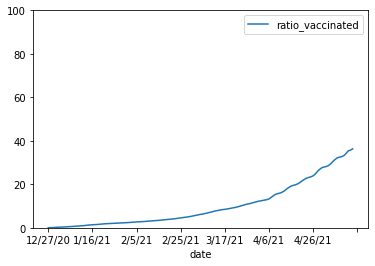

In [55]:
# Countries with most data points are: Germany, Belgium, Israel, Canada
# Let's print some graphs
plot_country_graph(df_ready, 'Germany')

Belgium percentage vaccination


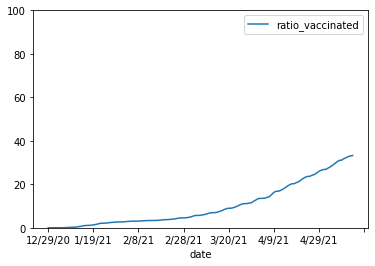

In [56]:
plot_country_graph(df_ready, 'Belgium')

Israel percentage vaccination


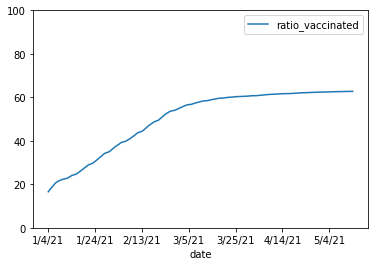

In [57]:
plot_country_graph(df_ready, 'Israel')

Canada percentage vaccination


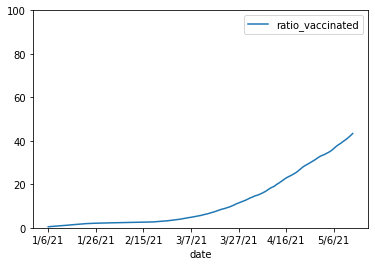

In [58]:
plot_country_graph(df_ready, 'Canada')

In [59]:
def train_poly_model(df_ready, country_name):
  data = df_ready[df_ready['location'] == country_name]
  data.head()
  dates_ordinal = data['ordinal_date'].to_list()
  dates = data['date'].to_list()
  dates_dt = data['date_dt'].to_list()
  ratio = data['ratio_vaccinated'].to_list()
  # print(dates_ordinal)
  # print(ratio)

  extended_range = [d for d in dates_dt]
  date = dates_dt[-1]
  for i in range(365):
      date += datetime.timedelta(days=1)
      extended_range.append(date)

  ## Mean temperatures ##
  z = np.polyfit(dates_ordinal, ratio, 3)
  print('Polynomial parameters ', z)
  p = np.poly1d(z)
  y_pred = p([d.toordinal() for d in extended_range])
  for i in range(len(y_pred)):
    if y_pred[i] >= 100:
      y_pred[i] = 100
  plt.plot(extended_range, y_pred, color='g', label='polyfit model')
  plt.scatter(dates_ordinal, ratio, color='b', label='% pop vaccinated', marker='.')
  plt.xticks(rotation=1000)
  plt.ylim(0, 110)
  plt.ylabel("Percentage population vaccinated")
  plt.legend()
  plt.show()

Polynomial parameters  [ 1.76912385e-09 -1.30523179e-03 -9.63117952e+02  7.10573302e+08]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


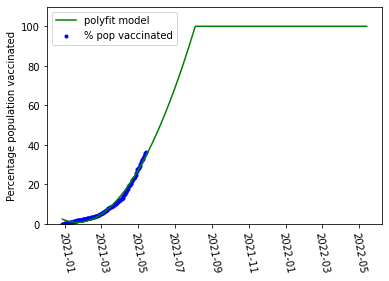

In [60]:
train_poly_model(df_ready, 'Germany')

Polynomial parameters  [-2.94033938e-09  2.16974179e-03  1.60089496e+03 -1.18133592e+09]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


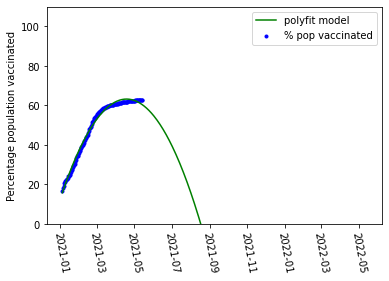

In [61]:
train_poly_model(df_ready, 'Israel')

Polynomial parameters  [ 1.65516852e-09 -1.22115058e-03 -9.01080866e+02  6.64799636e+08]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


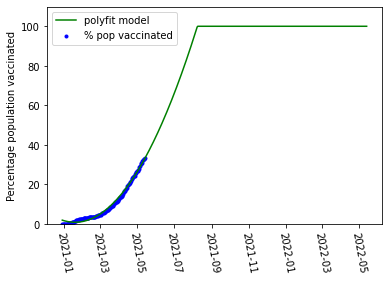

In [62]:
train_poly_model(df_ready, 'Belgium')

Polynomial parameters  [ 2.75978177e-09 -2.03616759e-03 -1.50246743e+03  1.10852080e+09]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


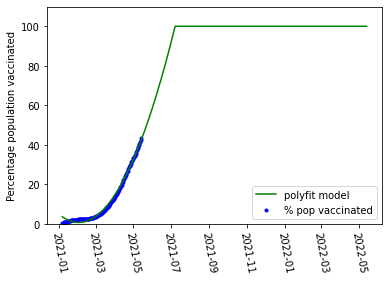

In [63]:
train_poly_model(df_ready, 'Canada')

In [22]:
def train_arima_model(df_ready, country_name, plot=False):
  data = df_ready[df_ready['location'] == country_name]
  data.head()
  dates_ordinal = data['ordinal_date'].to_list()
  dates = data['date'].to_list()
  dates_dt = data['date_dt'].to_list()
  ratio = data['ratio_vaccinated'].to_list()
  # print(dates_ordinal)
  # print(ratio)


  # ARIMA example
  from statsmodels.tsa.arima_model import ARIMA
  from random import random
  # contrived dataset
  # data = [x + random() for x in range(1, 100)]
  # fit model
  model = ARIMA(ratio, order=(4, 1, 1))
  model_fit = model.fit()
  pred = []
  # make prediction
  # build extended range
  extended_range = [d for d in dates_dt]
  date = dates_dt[-1]
  for i in range(365):
      date += datetime.timedelta(days=1)
      extended_range.append(date)
  yhat = model_fit.predict(start=1, end=len(extended_range), typ='levels')
  for i in range(len(yhat)):
    if yhat[i] >= 100:
      yhat[i] = 100
  ret_date = extended_range[0]
  for i in range(len(yhat)):
    if yhat[i] >= 70:
      # print('Reached 70 at date', extended_range[i])
      ret_date = extended_range[i]
      break
  if plot:
    plt.xticks(rotation=1000)

    plt.scatter(dates_dt, ratio)
    plt.plot(extended_range, yhat)
  return ret_date

train_arima_model(df_ready, 'Belgium')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


datetime.date(2021, 9, 12)

In [64]:
train_arima_model(df_ready, 'Israel')

datetime.date(2021, 8, 21)

In [65]:
# iterate over all countries and try to predict the date when they will have 70% of population vaccinated
immunity_days = []
failed_countries = []
for country in countries:
  try:
    country_immunity_day = train_arima_model(df_ready, country)
    immunity_days.append(country_immunity_day)
    print('The country %s is reaching immunity on day %s' % (country, country_immunity_day))
  except:
    # print('Failed for country %s' % (country))
    failed_countries.append(country)
# print('list of failed countries ', countries)

The country Argentina is reaching immunity on day 2021-01-20
The country Aruba is reaching immunity on day 2021-05-25
The country Austria is reaching immunity on day 2021-08-29
The country Azerbaijan is reaching immunity on day 2021-04-01
The country Bahrain is reaching immunity on day 2021-07-26
The country Bangladesh is reaching immunity on day 2021-04-08
The country Belgium is reaching immunity on day 2021-09-12
The country Bolivia is reaching immunity on day 2021-03-02
The country Brazil is reaching immunity on day 2022-05-04
The country Bulgaria is reaching immunity on day 2021-01-18
The country Cambodia is reaching immunity on day 2021-02-24


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


The country Canada is reaching immunity on day 2021-06-22
The country Cayman Islands is reaching immunity on day 2021-05-27
The country Chile is reaching immunity on day 2021-08-14


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


The country Colombia is reaching immunity on day 2021-03-13
The country Costa Rica is reaching immunity on day 2021-09-13
The country Croatia is reaching immunity on day 2021-10-02
The country Cyprus is reaching immunity on day 2021-06-08


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


The country Czechia is reaching immunity on day 2021-08-04
The country Denmark is reaching immunity on day 2021-12-20
The country Dominican Republic is reaching immunity on day 2021-08-27
The country Ecuador is reaching immunity on day 2021-02-17


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


The country El Salvador is reaching immunity on day 2021-08-29
The country Estonia is reaching immunity on day 2021-11-19
The country Finland is reaching immunity on day 2021-07-17
The country France is reaching immunity on day 2021-10-05


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


The country Germany is reaching immunity on day 2021-07-22


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


The country Greece is reaching immunity on day 2021-12-01


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:695: RuntimeWarning: divide by zero encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


The country Hong Kong is reaching immunity on day 2022-04-06
The country Hungary is reaching immunity on day 2021-07-26
The country Iceland is reaching immunity on day 2021-06-14
The country India is reaching immunity on day 2021-02-13
The country Indonesia is reaching immunity on day 2021-01-28
The country Israel is reaching immunity on day 2021-08-21


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


The country Italy is reaching immunity on day 2021-06-05
The country Japan is reaching immunity on day 2021-03-10


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


The country Latvia is reaching immunity on day 2021-09-27
The country Lebanon is reaching immunity on day 2021-03-10
The country Lithuania is reaching immunity on day 2021-09-24


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


The country Luxembourg is reaching immunity on day 2021-07-13
The country Macao is reaching immunity on day 2021-04-07
The country Malaysia is reaching immunity on day 2021-03-18
The country Maldives is reaching immunity on day 2021-07-24
The country Malta is reaching immunity on day 2021-06-04
The country Mexico is reaching immunity on day 2021-01-15
The country Moldova is reaching immunity on day 2021-04-15


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


The country Montenegro is reaching immunity on day 2021-12-19
The country Morocco is reaching immunity on day 2022-04-12


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


The country Namibia is reaching immunity on day 2021-04-19


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


The country New Zealand is reaching immunity on day 2021-07-01
The country Norway is reaching immunity on day 2021-12-24
The country Oman is reaching immunity on day 2021-01-17


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


The country Palestine is reaching immunity on day 2021-03-30
The country Panama is reaching immunity on day 2022-05-01
The country Paraguay is reaching immunity on day 2021-03-13
The country Peru is reaching immunity on day 2021-03-02
The country Philippines is reaching immunity on day 2021-03-30
The country Poland is reaching immunity on day 2021-08-25
The country Portugal is reaching immunity on day 2021-09-13
The country Romania is reaching immunity on day 2021-01-17
The country Russia is reaching immunity on day 2021-03-02
The country San Marino is reaching immunity on day 2021-05-30
The country Serbia is reaching immunity on day 2021-09-14
The country Seychelles is reaching immunity on day 2021-05-22


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:763: RuntimeWarning: divide by zero encountered in log
  return np.log(self.sigma2) + (1 + self.df_model) * np.log(nobs)/nobs
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


The country Sierra Leone is reaching immunity on day 2021-04-10
The country Slovakia is reaching immunity on day 2022-02-22
The country Slovenia is reaching immunity on day 2021-12-06
The country South Africa is reaching immunity on day 2021-02-18
The country South Korea is reaching immunity on day 2021-03-20
The country Spain is reaching immunity on day 2021-09-08
The country Sweden is reaching immunity on day 2021-06-13


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


The country Switzerland is reaching immunity on day 2021-08-15
The country Thailand is reaching immunity on day 2021-03-24
The country Tunisia is reaching immunity on day 2021-04-07
The country Turkey is reaching immunity on day 2021-02-12
The country Ukraine is reaching immunity on day 2021-03-17
The country United Kingdom is reaching immunity on day 2021-07-24
The country United States is reaching immunity on day 2021-08-29
The country Uruguay is reaching immunity on day 2021-08-10
The country Zimbabwe is reaching immunity on day 2021-03-22


In [66]:
print(len(countries))
print(failed_countries)
print(len(immunity_days))

114
['Albania', 'Barbados', 'Belarus', 'Bermuda', 'Dominica', 'Egypt', 'Equatorial Guinea', 'Gabon', 'Grenada', 'Guatemala', 'Guinea', 'Guyana', 'Iran', 'Ireland', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Mongolia', 'Myanmar', 'Netherlands', 'North Macedonia', 'Pakistan', 'Qatar', 'Saint Kitts and Nevis', 'Singapore', 'Solomon Islands', 'Sri Lanka', 'Suriname', 'Tonga', 'Trinidad and Tobago', 'United Arab Emirates', 'Vietnam']
80


In [67]:
# print the number of data points for countries where we couldn't predict the immunity day to notice any pattern
# the mean number of data points is 12
fc = by_country[failed_countries]
fc.describe()

count    34.000000
mean     11.882353
std      16.137223
min       2.000000
25%       3.000000
50%       8.000000
75%      15.000000
max      89.000000
Name: location, dtype: float64

In [68]:
# countries that the ARIMA model succeeded to predict have way higher mean of number of datapoints than 
# the failed 
# the mean number of data points in 73
sc = by_country[[c for c in countries if c not in failed_countries]]
sc.describe()

count     80.000000
mean      74.087500
std       37.264771
min        8.000000
25%       43.000000
50%       69.000000
75%      115.250000
max      139.000000
Name: location, dtype: float64

dict_keys([datetime.date(2021, 1, 20), datetime.date(2021, 5, 25), datetime.date(2021, 8, 29), datetime.date(2021, 4, 1), datetime.date(2021, 7, 26), datetime.date(2021, 4, 8), datetime.date(2021, 9, 12), datetime.date(2021, 3, 2), datetime.date(2022, 5, 4), datetime.date(2021, 1, 18), datetime.date(2021, 2, 24), datetime.date(2021, 6, 22), datetime.date(2021, 5, 27), datetime.date(2021, 8, 14), datetime.date(2021, 3, 13), datetime.date(2021, 9, 13), datetime.date(2021, 10, 2), datetime.date(2021, 6, 8), datetime.date(2021, 8, 4), datetime.date(2021, 12, 20), datetime.date(2021, 8, 27), datetime.date(2021, 2, 17), datetime.date(2021, 11, 19), datetime.date(2021, 7, 17), datetime.date(2021, 10, 5), datetime.date(2021, 7, 22), datetime.date(2021, 12, 1), datetime.date(2022, 4, 6), datetime.date(2021, 6, 14), datetime.date(2021, 2, 13), datetime.date(2021, 1, 28), datetime.date(2021, 8, 21), datetime.date(2021, 6, 5), datetime.date(2021, 3, 10), datetime.date(2021, 9, 27), datetime.date(2

Text(0.5, 1.0, 'Number of countries reaching immunity per date')

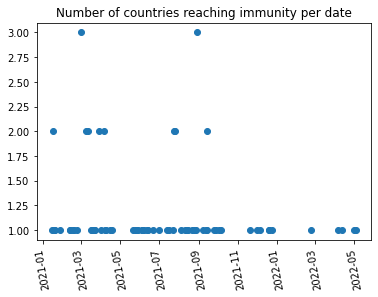

In [69]:
# countries reaching immunity
countries_reaching_immunity = [c for c in countries if c not in failed_countries]
f = dict()
for i in range(len(immunity_days)):
  try:
    f[immunity_days[i]] += 1
  except:
    f[immunity_days[i]] = 1
# for 
print(f.keys())
print(f.values())
plt.scatter([d for d in f.keys()], [v for v in f.values()])
plt.xticks(rotation=100)
plt.title('Number of countries reaching immunity per date')

In [70]:
!pip install geopandas

In [71]:
# create dataframe for the day of reaching immunity for every country we could estimate for
df_immunity = pd.DataFrame({'name': countries_reaching_immunity, 'immunity_day': immunity_days})
df_immunity.head()

,name,immunity_day
0,Argentina,2021-01-20
1,Aruba,2021-05-25
2,Austria,2021-08-29
3,Azerbaijan,2021-04-01
4,Bahrain,2021-07-26


In [72]:
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# world.plot()
world_immunity = pd.merge(world, df_immunity, on='name')
world_immunity.head()
# world.plot(column='gdp_md_est	', cmap='OrRd', scheme='quantiles');

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,immunity_day
0,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.840 49.000, -122.974 49.0...",2021-06-22
1,260580739,Asia,Indonesia,IDN,3028000.0,"MULTIPOLYGON (((141.000 -2.600, 141.017 -5.859...",2021-01-28
2,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.634 -52.636, -68.250 -53.1...",2021-01-20
3,17789267,South America,Chile,CHL,436100.0,"MULTIPOLYGON (((-68.634 -52.636, -68.633 -54.8...",2021-08-14
4,142257519,Europe,Russia,RUS,3745000.0,"MULTIPOLYGON (((178.725 71.099, 180.000 71.516...",2021-03-02


In [75]:
world_immunity[world_immunity['name'] == 'Canada']

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,immunity_day
0,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",2021-06-22


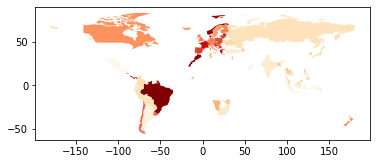

In [76]:
world_immunity.plot(column='immunity_day', cmap='OrRd')

In [77]:
import geopandas

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
# world.plot(column='gdp_per_cap');
# fig, ax = plt.subplots(1, 1)
# world.plot(column='pop_est', ax=ax, legend=True)
world.columns

Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry',
       'gdp_per_cap'],
      dtype='object')

In [78]:
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M